In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print(pd.__version__) 

2.2.3


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Product-Details.csv')

print(df.head())

   Product_Id Product_Category Product_Type           Products
0        1087         Clothing       Shorts     Cycling shorts
1        1165      Electronics       Tablet         Lenovo Tab
2        1271            Books   Children's   Sports equipment
3        1304       Home Decor        Tools      Utility knife
4        1059          Grocery    Chocolate  Chocolate cookies


In [4]:
df = df.drop_duplicates()

df['Product_Category'] = df['Product_Category'].fillna('Unknown')

In [5]:
customer_df = pd.read_csv("Customer-Details.csv")
product_df = pd.read_csv("Product-Details.csv")

customer_df.head(), product_df.head()

(   Customer_ID                 Name                Email         Phone  \
 0      37249.0  Michelle Harrington    Ebony39@gmail.com  1.414787e+09   
 1      69749.0          Kelsey Hill     Mark36@gmail.com  6.852900e+09   
 2      30192.0         Scott Jensen    Shane85@gmail.com  8.362160e+09   
 3      62101.0        Joseph Miller     Mary34@gmail.com  2.776752e+09   
 4      27901.0        Debra Coleman  Charles30@gmail.com  9.098268e+09   
 
                        Address        City            State  Zipcode  \
 0            3959 Amanda Burgs    Dortmund           Berlin  77985.0   
 1           82072 Dawn Centers  Nottingham          England  99071.0   
 2            4133 Young Canyon     Geelong  New South Wales  75929.0   
 3  8148 Thomas Creek Suite 100    Edmonton          Ontario  88420.0   
 4    5813 Lori Ports Suite 269     Bristol          England  48704.0   
 
      Country   Age  Gender Income Customer_Segment  
 0    Germany  21.0    Male    Low          Regular  


In [9]:
print(customer_df.columns)
print(product_df.columns)

Index(['Customer_ID', 'Name', 'Email', 'Phone', 'Address', 'City', 'State',
       'Zipcode', 'Country', 'Age', 'Gender', 'Income', 'Customer_Segment'],
      dtype='object')
Index(['Product_Id', 'Product_Category', 'Product_Type', 'Products'], dtype='object')


In [14]:
print(customer_df.columns)
print(product_df.columns)

Index(['Customer_ID', 'Name', 'Email', 'Phone', 'Address', 'City', 'State',
       'Zipcode', 'Country', 'Age', 'Gender', 'Income', 'Customer_Segment'],
      dtype='object')
Index(['Product_Id', 'Product_Category', 'Product_Type', 'Products'], dtype='object')


In [17]:
sales_df = pd.read_csv("Product-Details.csv")  
print(sales_df.columns)

Index(['Product_Id', 'Product_Category', 'Product_Type', 'Products'], dtype='object')


In [22]:
orders_df = pd.read_csv("Order-Details.csv")
print(orders_df.columns) 


Index(['Transaction_ID', 'Customer_ID', 'Date', 'Total_Purchases', 'Amount',
       'Product_Id', 'Feedback', 'Shipping_Method', 'Payment_Method',
       'Order_Status', 'Ratings'],
      dtype='object')


In [23]:
orders_df['Date'] = pd.to_datetime(orders_df['Date'])

orders_df['Year_Month'] = orders_df['Date'].dt.to_period('M')

print(orders_df.isnull().sum())


Transaction_ID     333
Customer_ID        308
Date               359
Total_Purchases    361
Amount             357
Product_Id           0
Feedback           184
Shipping_Method    337
Payment_Method     297
Order_Status       235
Ratings            184
Year_Month         359
dtype: int64


In [24]:
monthly_sales = orders_df.groupby('Year_Month').agg(
    total_purchases=('Total_Purchases', 'sum'),
    total_amount=('Amount', 'sum')
).reset_index()

print(monthly_sales.head())


  Year_Month  total_purchases  total_amount
0    2023-03         137582.0  6.537171e+06
1    2023-04         132854.0  6.311766e+06
2    2023-05         135045.0  6.449291e+06
3    2023-06         132372.0  6.296884e+06
4    2023-07         137205.0  6.484790e+06


In [26]:
print(monthly_sales['Year_Month'].dtype)

monthly_sales['Year_Month'] = pd.to_datetime(monthly_sales['Year_Month'].astype(str))

print(monthly_sales['Year_Month'].dtype)

period[M]
datetime64[ns]


In [27]:
print(monthly_sales[['total_purchases', 'total_amount']].dtypes)

monthly_sales['total_purchases'] = pd.to_numeric(monthly_sales['total_purchases'], errors='coerce')
monthly_sales['total_amount'] = pd.to_numeric(monthly_sales['total_amount'], errors='coerce')

print(monthly_sales[['total_purchases', 'total_amount']].isnull().sum())

total_purchases    float64
total_amount       float64
dtype: object
total_purchases    0
total_amount       0
dtype: int64


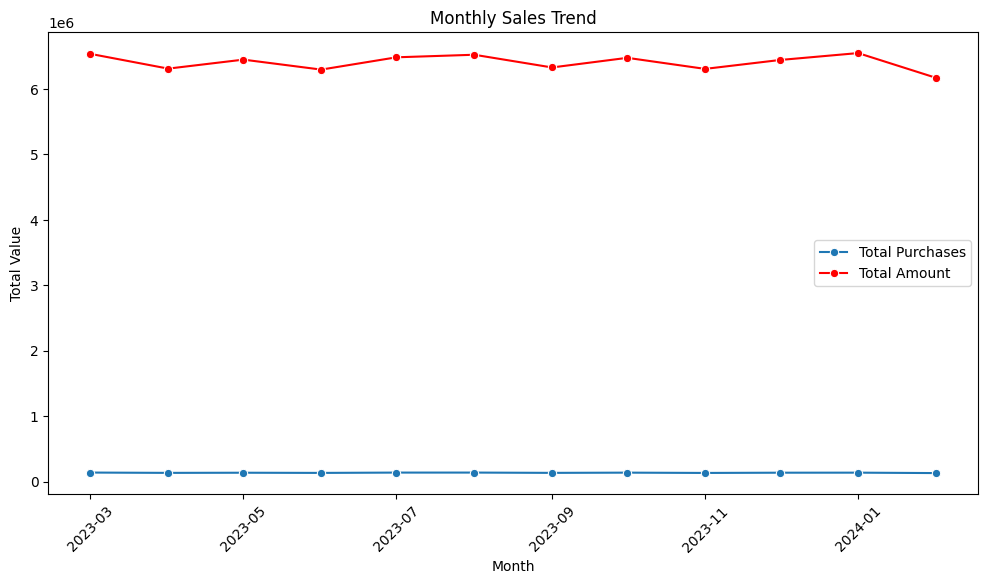

In [28]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year_Month', y='total_purchases', data=monthly_sales, marker='o', label='Total Purchases')
sns.lineplot(x='Year_Month', y='total_amount', data=monthly_sales, marker='o', label='Total Amount', color='red')

plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Value")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [29]:
print(monthly_sales[monthly_sales['Year_Month'].isna()])

Empty DataFrame
Columns: [Year_Month, total_purchases, total_amount]
Index: []


In [30]:
monthly_sales_aggregated = monthly_sales.groupby('Year_Month').agg({
    'total_purchases': 'sum',
    'total_amount': 'sum'
}).reset_index()

print(monthly_sales_aggregated.head())

  Year_Month  total_purchases  total_amount
0 2023-03-01         137582.0  6.537171e+06
1 2023-04-01         132854.0  6.311766e+06
2 2023-05-01         135045.0  6.449291e+06
3 2023-06-01         132372.0  6.296884e+06
4 2023-07-01         137205.0  6.484790e+06


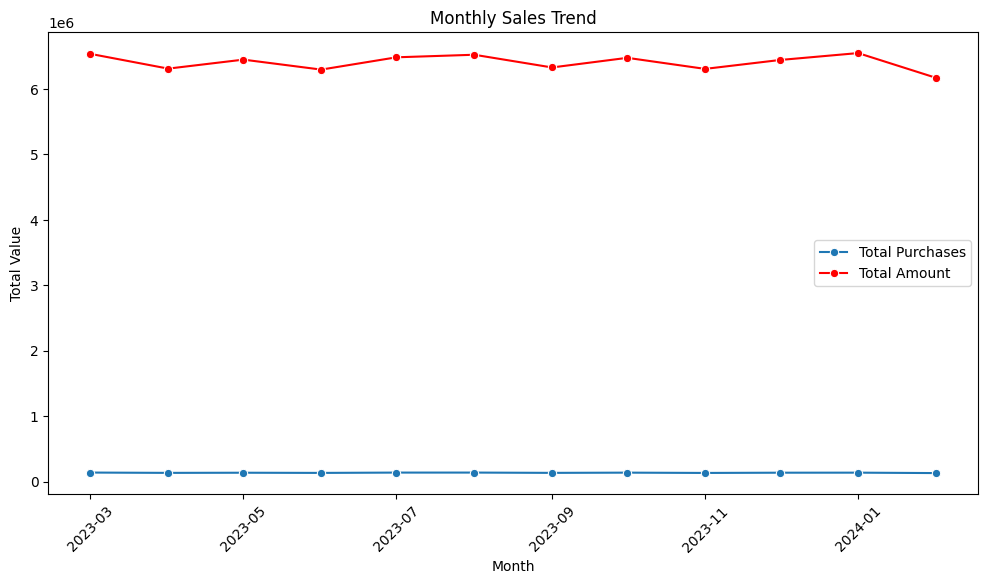

In [31]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year_Month', y='total_purchases', data=monthly_sales_aggregated, marker='o', label='Total Purchases')
sns.lineplot(x='Year_Month', y='total_amount', data=monthly_sales_aggregated, marker='o', label='Total Amount', color='red')

plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Value")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [32]:
print(monthly_sales['Year_Month'].unique())


<DatetimeArray>
['2023-03-01 00:00:00', '2023-04-01 00:00:00', '2023-05-01 00:00:00',
 '2023-06-01 00:00:00', '2023-07-01 00:00:00', '2023-08-01 00:00:00',
 '2023-09-01 00:00:00', '2023-10-01 00:00:00', '2023-11-01 00:00:00',
 '2023-12-01 00:00:00', '2024-01-01 00:00:00', '2024-02-01 00:00:00']
Length: 12, dtype: datetime64[ns]


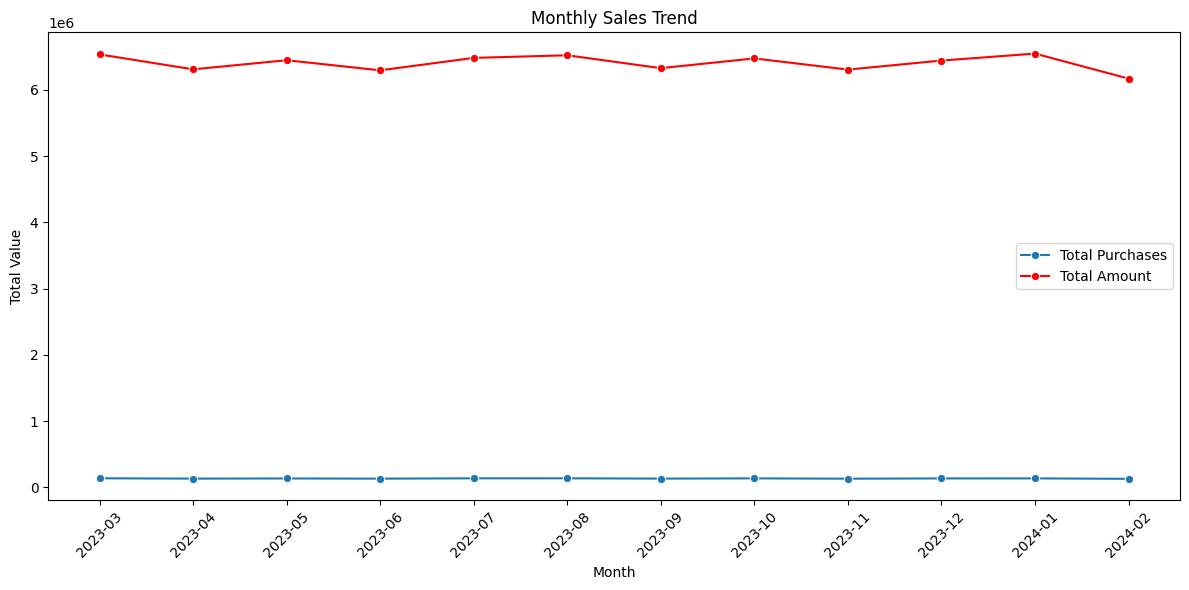

In [36]:
monthly_sales_aggregated['Year_Month'] = pd.to_datetime(monthly_sales_aggregated['Year_Month'], errors='coerce')

monthly_sales_aggregated['Year_Month'] = monthly_sales_aggregated['Year_Month'].dt.strftime('%Y-%m')

plt.figure(figsize=(12, 6))

sns.lineplot(x='Year_Month', y='total_purchases', data=monthly_sales_aggregated, marker='o', label='Total Purchases')

sns.lineplot(x='Year_Month', y='total_amount', data=monthly_sales_aggregated, marker='o', label='Total Amount', color='red')

plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Value")
plt.xticks(rotation=45)  
plt.legend()
plt.tight_layout() 
plt.show()


In [38]:
monthly_sales_aggregated.ffill(inplace=True)

In [41]:
pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 19.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 23.4 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: /Users/zionlawrence/myenv/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


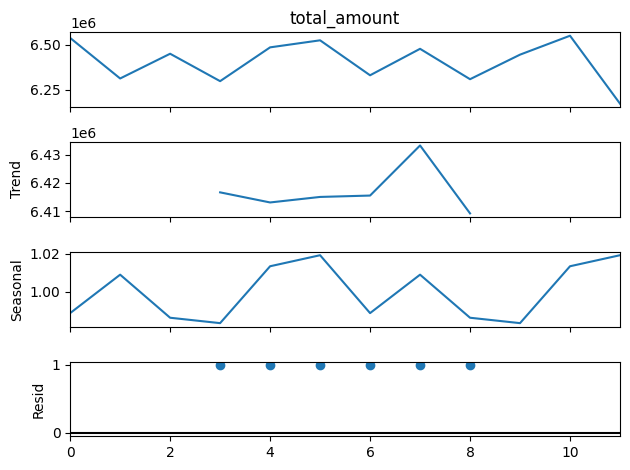

In [24]:
decomposition = seasonal_decompose(monthly_sales_aggregated['total_amount'], model='multiplicative', period=6)

decomposition.plot()
plt.show()

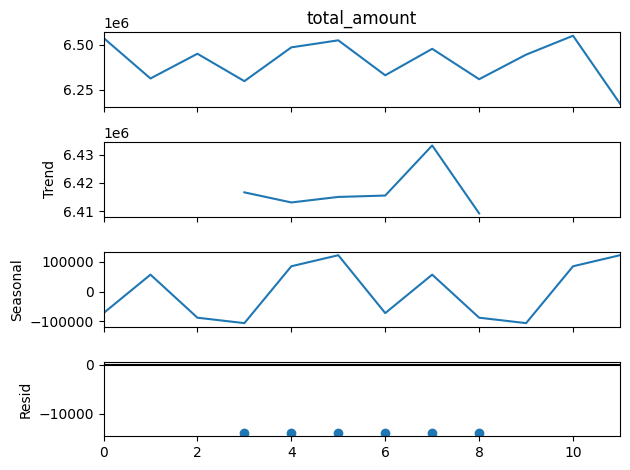

In [25]:
decomposition = seasonal_decompose(monthly_sales_aggregated['total_amount'], model='additive', period=6)

decomposition.plot()
plt.show()

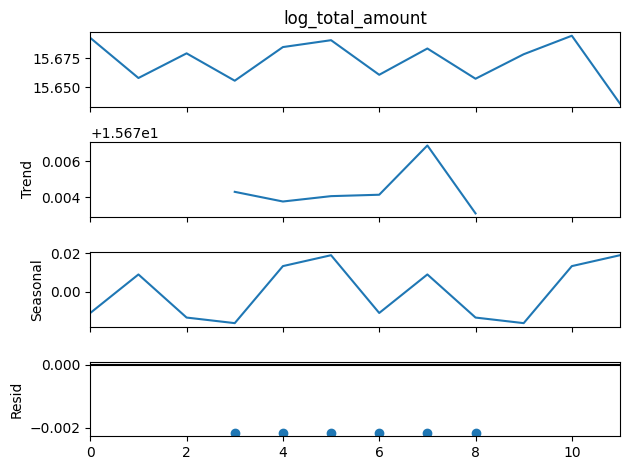

In [26]:
import numpy as np

monthly_sales_aggregated['log_total_amount'] = np.log(monthly_sales_aggregated['total_amount'])

decomposition = seasonal_decompose(monthly_sales_aggregated['log_total_amount'], model='additive', period=6)

decomposition.plot()
plt.show()

In [27]:
print(monthly_sales_aggregated['total_amount'].min())

6171840.76049605


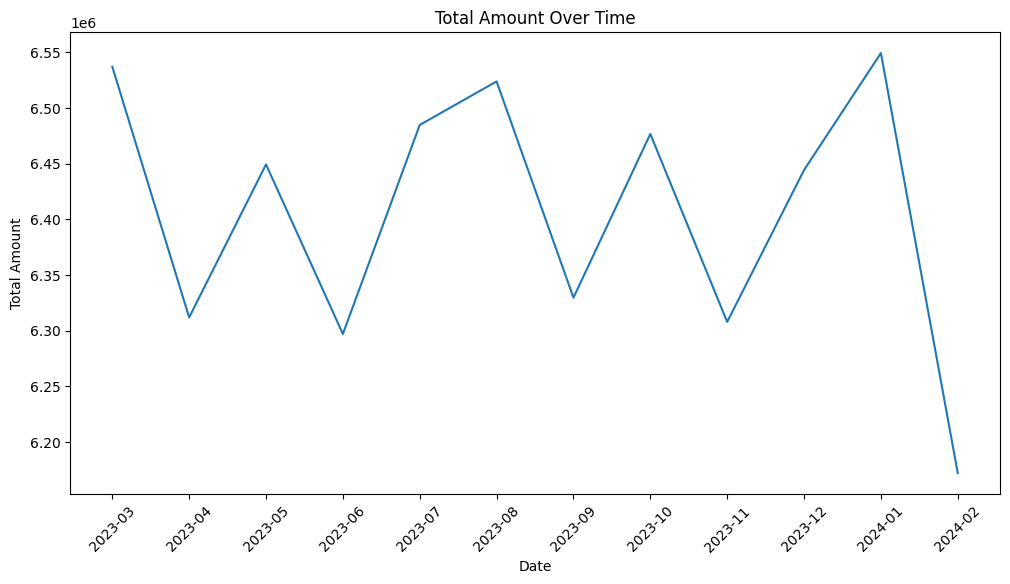

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales_aggregated['Year_Month'], monthly_sales_aggregated['total_amount'])
plt.title('Total Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()

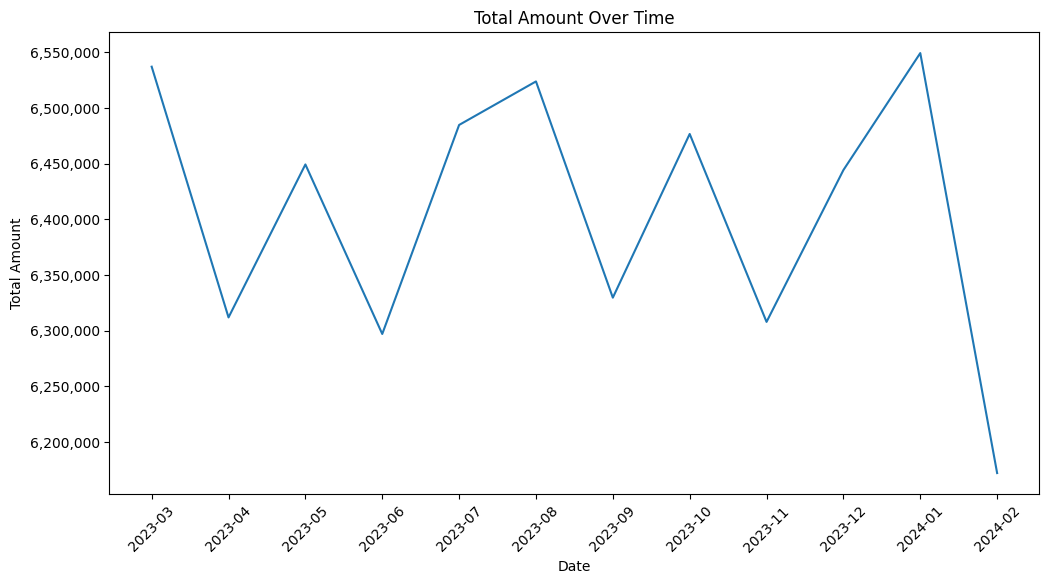

In [29]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales_aggregated['Year_Month'], monthly_sales_aggregated['total_amount'])

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.title('Total Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()